In [1]:
import evaluation
from CA_model import CA_model
import topography
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# initialize 'snow dune topography' Popovic et al., 2020

size = 200                       # size of the domain
mode = 'snow_dune'              # topography type
tmax = 2; dt = 0.1              # diffusion time and time-step if mode = 'diffusion' or mode = 'rayleigh'
g = 1                           # anisotropy parameter
sigma_h = 0.03                  # surface standard deviation
snow_dune_radius = 1.           # mean snow dune radius if mode = 'snow_dune'
Gaussians_per_pixel = 0.2       # density of snow dunes if mode = 'snow_dune'
snow_dune_height_exponent = 1.  # exponent that relates snow dune radius and snow dune height if mode = 'snow_dune'

mean_freeboard = 0.1

Tdrain = 10.; dt_drain = 0.5    # time and time-step of to drainage

# create topography
Ht_0 = topography.Create_Initial_Topography(res = size, mode = mode, tmax = tmax, dt = dt, g = g, sigma_h = sigma_h, h = mean_freeboard, snow_dune_radius = snow_dune_radius,
            Gaussians_per_pixel = Gaussians_per_pixel, number_of_r_bins = 150, window_size = 5, snow_dune_height_exponent = snow_dune_height_exponent)

/Users/paulhosek/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/paulhosek/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [3]:
# initally no surface water
h = np.zeros(shape = (size, size))

# initalize model
ca_model = CA_model(Ht_0, h, dt = 15, dx = 1, periodic_bounds=True)

### Fractal Dimension 1:
- after about 40h we can see ponds forming simple euclidean shapes
- no percolation is observed

In [4]:
# run model
h, H, Ht = ca_model.run(10000) # 10.000

In [5]:
thresh = 0.02 # set min surface water depth for pond
binary_percolation, percolating_cluster = evaluation.detect_percolation(np.where(h<thresh,0,1), len(h))
binary_percolation

False

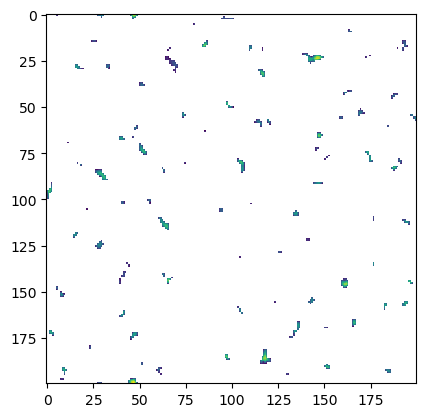

In [6]:
plt.imshow(np.ma.masked_where(h<thresh,h))
plt.savefig("10k_nopercolation", bbox_inches="tight", dpi=300, transparent=True)

### Fractal Dimension 2

- after another 20h, we observe complex ponds emerge
- no percolating cluster emerges yet

In [7]:
# run model
h, H, Ht = ca_model.run(5000) # 10.000

In [8]:
thresh = 0.02 # set min surface water depth for pond
binary_percolation, percolating_cluster = evaluation.detect_percolation(np.where(h<thresh,0,1), len(h))
binary_percolation

False

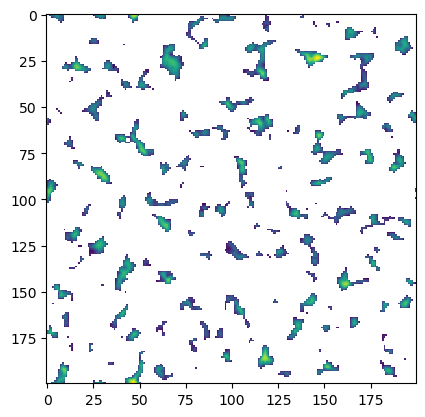

In [9]:
plt.imshow(np.ma.masked_where(h<thresh,h))
plt.savefig("15k_nopercolation", bbox_inches="tight", dpi=300, transparent=True)

### Percolation
- if we continue to run the model, a percolating cluster emerges by merging between multiple ponds

In [10]:
# run model
binary_percolation = False
while not binary_percolation:
    h, H, Ht = ca_model.run(1000)
    binary_percolation, percolating_cluster = evaluation.detect_percolation(np.where(h<thresh,0,1), len(h))

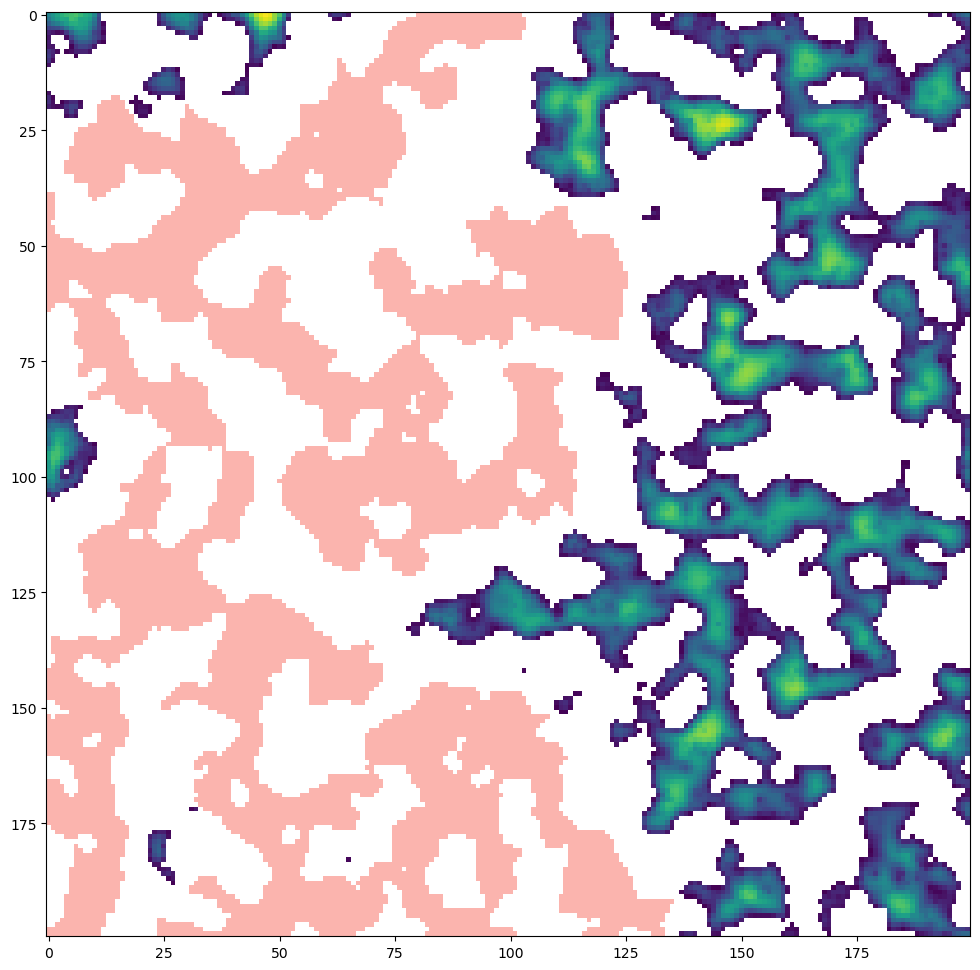

In [11]:
plt.figure(figsize=(12,12))
plt.imshow(np.ma.masked_where(h<thresh,h))
plt.imshow(percolating_cluster, cmap='Pastel1')
plt.savefig("25k_percolation", bbox_inches="tight", dpi=300, transparent=True)